# Problem Statement

# The Iris flower dataset consists of three species: setosa, versicolor, and virginica. These species can be distinguished based on their measurements. Now, imagine that you have the measurements of Iris flowers categorized by their respective species. Your objective is to train a machine learning model that can learn from these measurements and accurately classify the Iris flowers into their respective species.

# Use the Iris dataset to develop a model that can classify iris flowers into different species based on their sepal and petal measurements. This dataset is widely used for introductory classification tasks.

# Importing the Required Libraries

In [5]:
import pandas as pd
import numpy as np

In [6]:
df=pd.read_csv("IRIS.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
df.shape

(150, 5)

In [10]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

# As from the above Information there is no null values 

<Axes: >

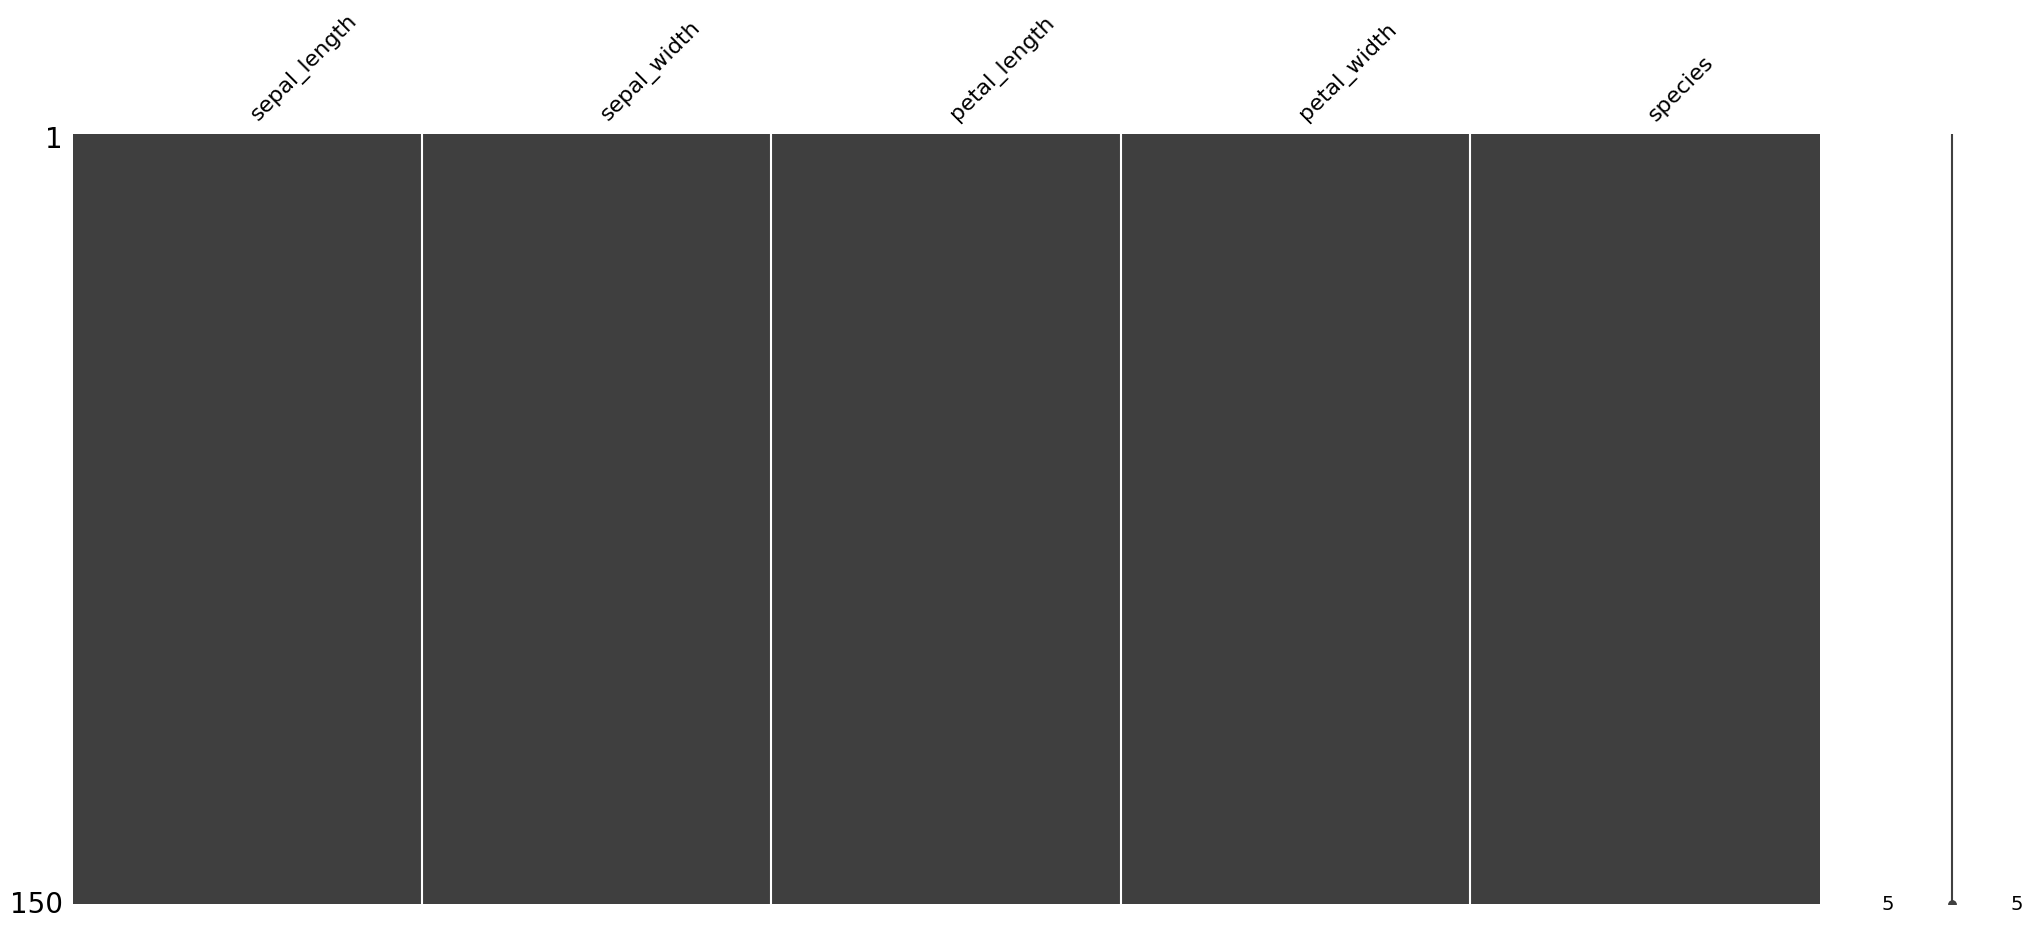

In [11]:
import missingno as msn
msn.matrix(df)

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='species', ylabel='count'>

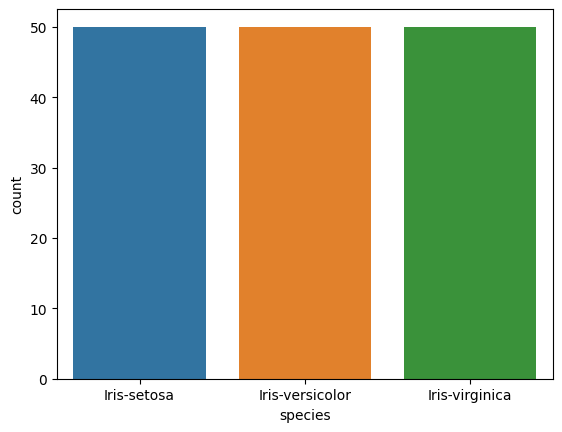

In [26]:
sns.countplot(x='species',data=df)

# All Three Species IRIS-Setosa , IRIS-Versicolr and IRIS-virginica have equal amount of data

# Univariate Analysis

{'whiskers': [<matplotlib.lines.Line2D at 0x205cb2af040>,
 'caps': [<matplotlib.lines.Line2D at 0x205cb2af5b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x205cb29ad60>],
 'medians': [<matplotlib.lines.Line2D at 0x205cb2afaf0>],
 'fliers': [<matplotlib.lines.Line2D at 0x205cb2afd90>],
 'means': []}

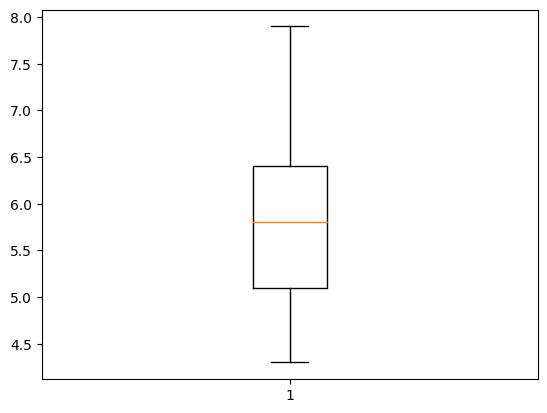

In [27]:
plt.boxplot(df['sepal_length'])

{'whiskers': [<matplotlib.lines.Line2D at 0x205cb314c40>,
 'caps': [<matplotlib.lines.Line2D at 0x205cb3241c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x205cb3149a0>],
 'medians': [<matplotlib.lines.Line2D at 0x205cb324700>],
 'fliers': [<matplotlib.lines.Line2D at 0x205cb3249a0>],
 'means': []}

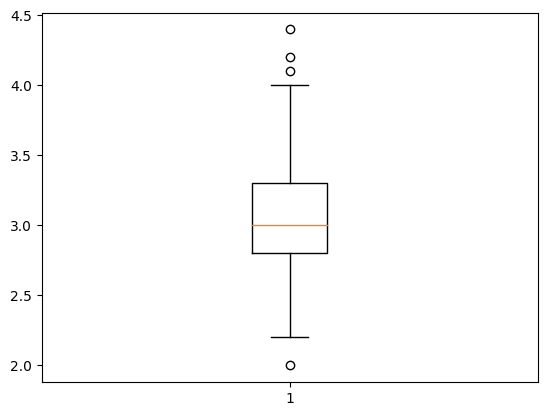

In [28]:
plt.boxplot(df['sepal_width'])

# Outliers are present in Sepal _width

{'whiskers': [<matplotlib.lines.Line2D at 0x205ae994310>,
 'caps': [<matplotlib.lines.Line2D at 0x205b93cb580>,
 'boxes': [<matplotlib.lines.Line2D at 0x205b5a86d30>],
 'medians': [<matplotlib.lines.Line2D at 0x205b93eb550>],
 'fliers': [<matplotlib.lines.Line2D at 0x205b6138250>],
 'means': []}

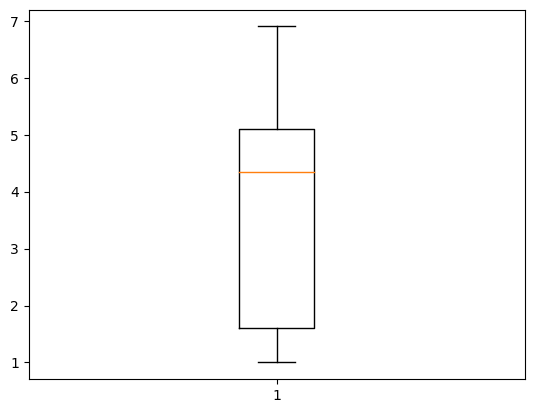

In [29]:
plt.boxplot(df['petal_length'])

{'whiskers': [<matplotlib.lines.Line2D at 0x205c1a93ca0>,
 'caps': [<matplotlib.lines.Line2D at 0x205c1ab3760>,
 'boxes': [<matplotlib.lines.Line2D at 0x205c1a93160>],
 'medians': [<matplotlib.lines.Line2D at 0x205c1aadc70>],
 'fliers': [<matplotlib.lines.Line2D at 0x205c1aada30>],
 'means': []}

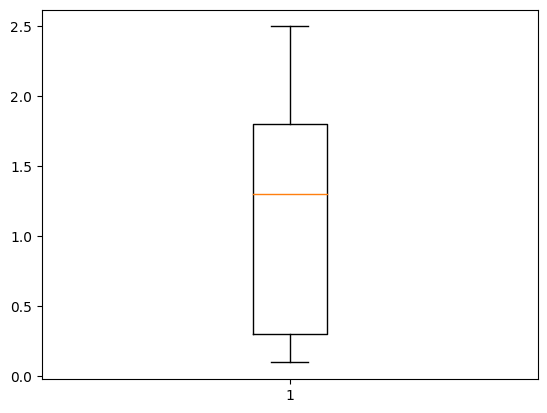

In [30]:
plt.boxplot(df['petal_width'])

# Only Sepal Length have Outliers in the data

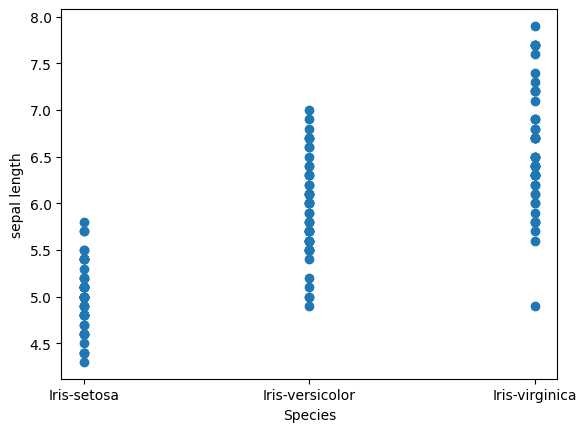

In [36]:
plt.scatter(x=df['species'],y=df['sepal_length'])
plt.xlabel("Species")
plt.ylabel("sepal length")
plt.show()

# calculate median of each species

In [43]:
x=df.groupby("species").median()
x

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,5.0,3.4,1.50,0.2
Iris-versicolor,5.9,2.8,4.35,1.3
Iris-virginica,6.5,3.0,5.55,2.0


In [44]:
Statistical_summary=df.describe()

In [45]:
Statistical_summary.loc['range'] = Statistical_summary.loc['max'] - Statistical_summary.loc['min']
df_new = Statistical_summary.loc[['mean', 'range', '25%', '50%', '75%']]
df_new.rename({'50%': 'median'}, inplace=True)
df_new

,sepal_length,sepal_width,petal_length,petal_width
mean,5.843333,3.054,3.758667,1.198667
range,3.600000,2.400,5.900000,2.400000
25%,5.100000,2.800,1.600000,0.300000
median,5.800000,3.000,4.350000,1.300000
75%,6.400000,3.300,5.100000,1.800000


# Distributionplot of Petal Width

<Axes: >

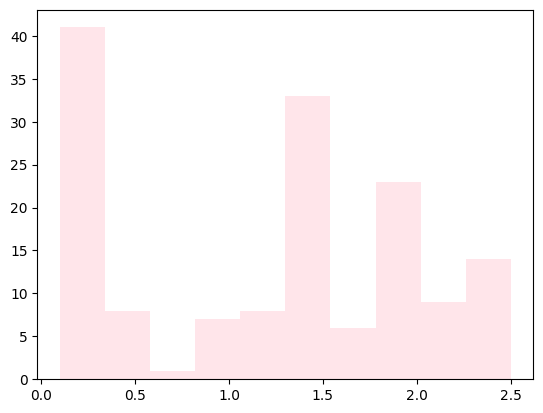

In [50]:
import warnings
warnings.filterwarnings("ignore")
sns.distplot(x=df['petal_width'],bins=10,color='pink',kde=False)


<Axes: xlabel='species', ylabel='sepal_width'>

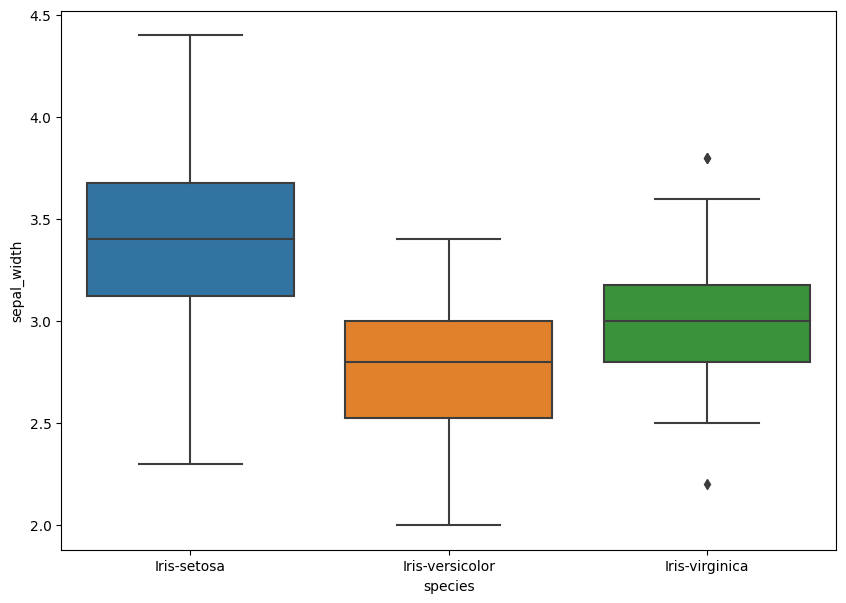

In [52]:
plt.figure(figsize=(10,7))
sns.boxplot(x='species',y='sepal_width',data=df )

<Axes: xlabel='species', ylabel='petal_length'>

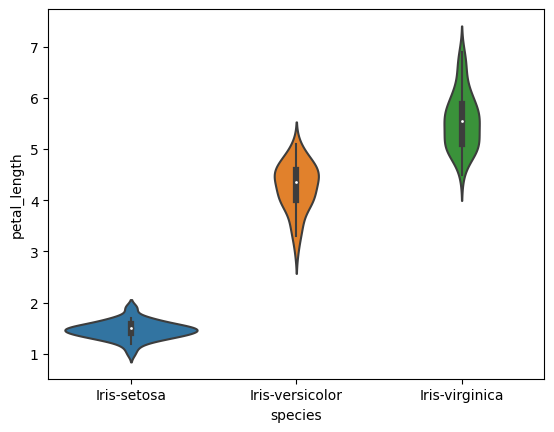

In [53]:
sns.violinplot(x='species',y='petal_length',data=df)

# Multivariate Analysis

In [54]:
dfc=df.corr()

<Axes: >

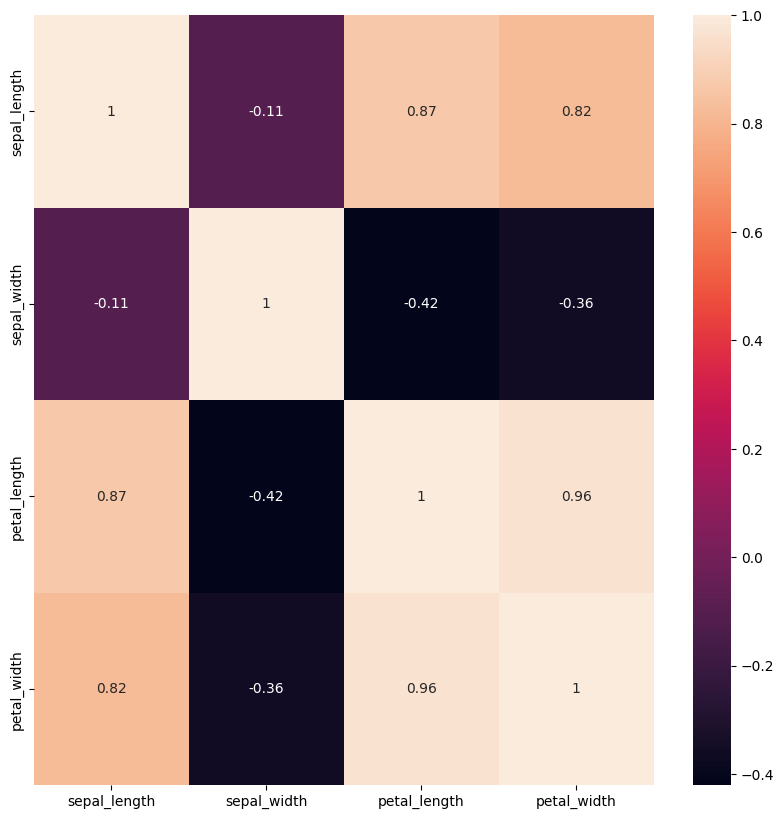

In [63]:
plt.figure(figsize=(10,10))
sns.heatmap(dfc,annot=True)

# LMPLOTS

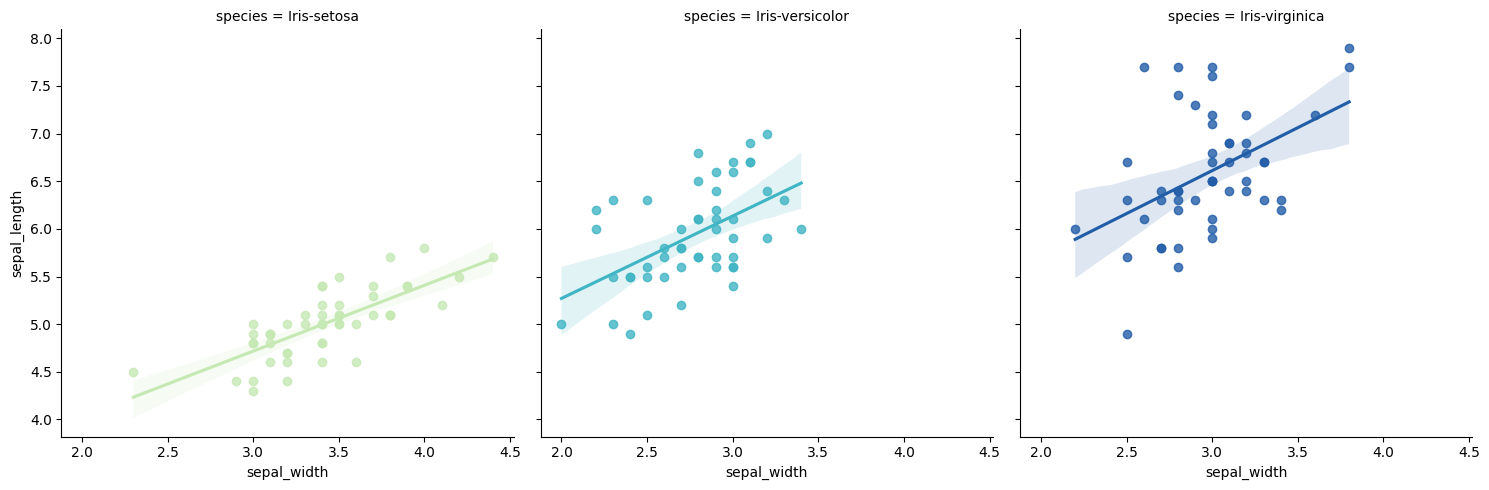

In [57]:
sns.lmplot(x = 'sepal_width', y = 'sepal_length', data = df, col = 'species', hue = 'species', palette = 'YlGnBu')

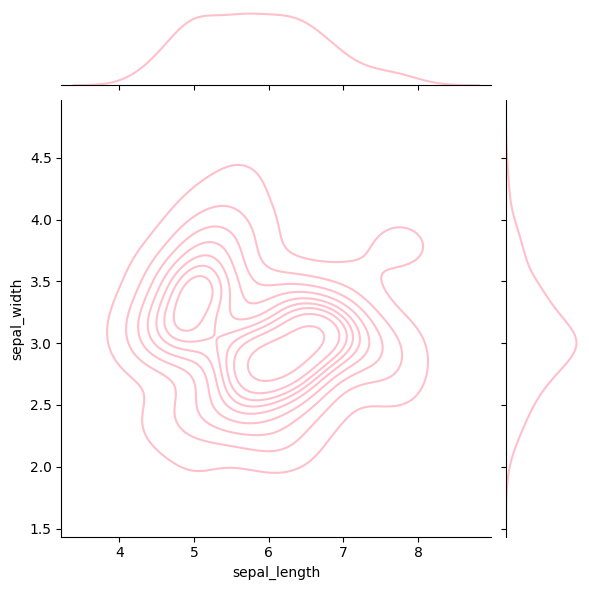

In [62]:
sns.jointplot(x=df['sepal_length'],y=df['sepal_width'],data=df,kind='kde',color='pink')

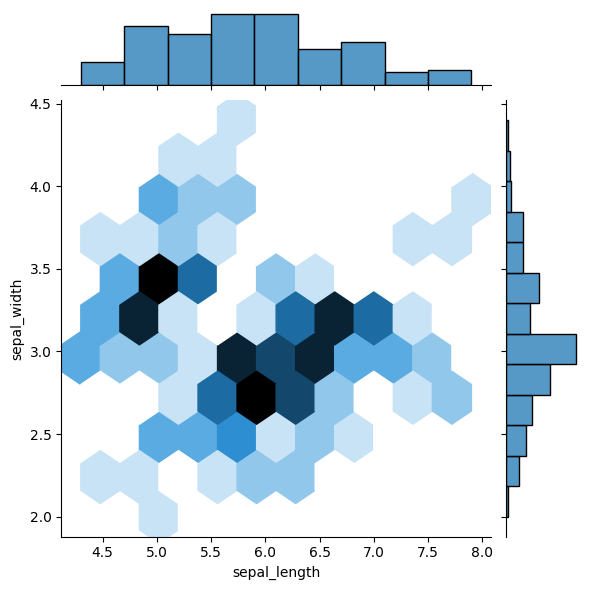

In [60]:
sns.jointplot(x=df['sepal_length'],y=df['sepal_width'],data=df,kind='hex')

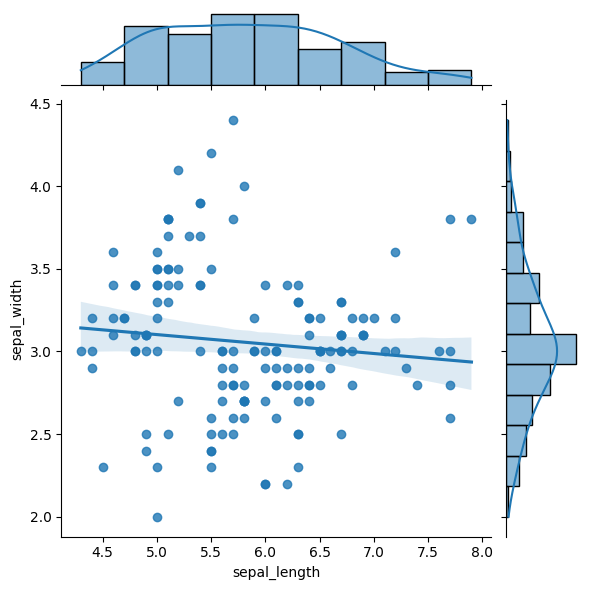

In [61]:
sns.jointplot(x=df['sepal_length'],y=df['sepal_width'],data=df,kind='reg')

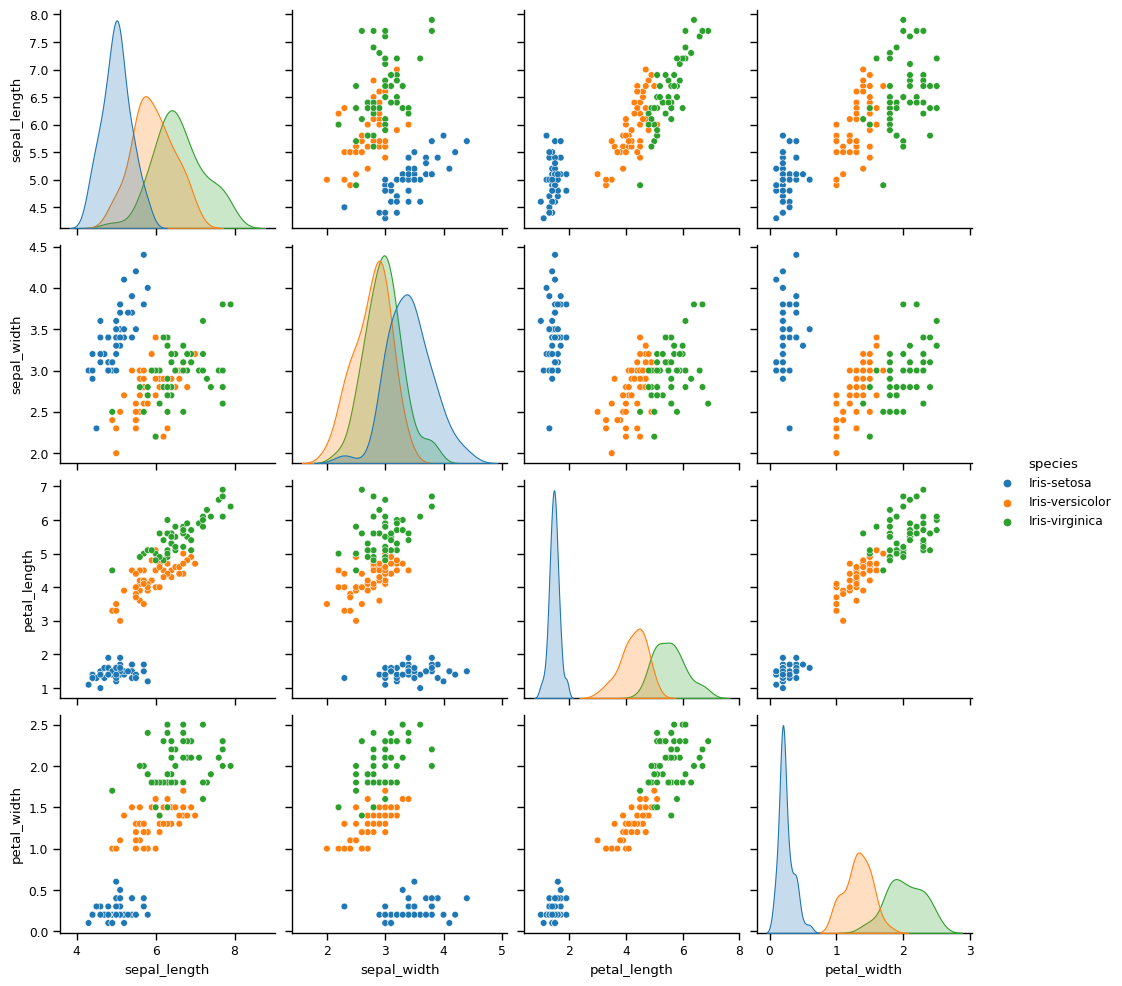

In [70]:
sns.set_context('paper')
sns.pairplot(df, hue='species');

In [72]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
le=LabelEncoder()


In [73]:
df['species']=le.fit_transform(df['species'])

In [74]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [75]:
df['species'].value_counts()

0    50
1    50
2    50
Name: species, dtype: int64

# Removing Outliers 

In [76]:
from scipy import stats
from scipy.stats import zscore
z=np.abs(zscore(df))
z

,sepal_length,sepal_width,petal_length,petal_width,species
0,0.900681,1.032057,1.341272,1.312977,1.224745
1,1.143017,0.124958,1.341272,1.312977,1.224745
2,1.385353,0.337848,1.398138,1.312977,1.224745
3,1.506521,0.106445,1.284407,1.312977,1.224745
4,1.021849,1.263460,1.341272,1.312977,1.224745
...,...,...,...,...,...
145,1.038005,0.124958,0.819624,1.447956,1.224745
146,0.553333,1.281972,0.705893,0.922064,1.224745
147,0.795669,0.124958,0.819624,1.053537,1.224745
148,0.432165,0.800654,0.933356,1.447956,1.224745


In [77]:
dfs=df.copy()

In [78]:
dfs.skew()

sepal_length    0.314911
sepal_width     0.334053
petal_length   -0.274464
petal_width    -0.104997
species         0.000000
dtype: float64

In [83]:
dfn=df[(z<3).all(axis=1)]
dfn

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [80]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression,LogisticRegression

In [81]:
lg=LogisticRegression()

In [84]:
x=dfn.iloc[:,:-1]
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [85]:
y=dfn.iloc[:,-1:]
y

,species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [86]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.35,random_state=42)

In [87]:
lg.fit(train_x,train_y)

LogisticRegression()

In [88]:
lg.coef_

array([[-0.4820426 ,  0.7622634 , -2.25698371, -0.9884846 ],
       [ 0.29850942, -0.39056821, -0.18582979, -0.76095433],
       [ 0.18353317, -0.37169519,  2.44281349,  1.74943893]])

In [90]:
y_pred=lg.predict(test_x)

In [91]:
print("Predicted",y_pred)

Predicted [1 0 2 1 2 0 1 2 1 2 2 0 0 0 0 1 2 2 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 1 1
 0 0 0 2 1 1 0 0 1 2 2 1 2 1 2 1]


In [95]:
from sklearn.metrics import accuracy_score
print("Accuracy_score",accuracy_score(test_y,y_pred)*100,'%')

Accuracy_score 92.45283018867924 %


In [97]:
from sklearn.metrics import classification_report
print(classification_report(test_y,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.93      0.82      0.87        17
           2       0.84      0.94      0.89        17

    accuracy                           0.92        53
   macro avg       0.93      0.92      0.92        53
weighted avg       0.93      0.92      0.92        53

